In [1]:
import pandas as pd 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data preprocessing

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop 'customerID' as it is irrelevant
df.drop(columns=['customerID'], inplace=True)

# Encode categorical variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
df = pd.get_dummies(df, columns=[
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Split dataset into training and test sets
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Dataset is ready for model training.")


Preprocessing complete. Dataset is ready for model training.


The message "Preprocessing complete. Dataset is ready for model training." means that the dataset has been successfully cleaned and transformed, and it's now ready to be used for training machine learning models.
we have ,


handled Missing Values – Any missing TotalCharges values have been filled.
 Converted Data Types – TotalCharges was converted to numeric.
 Dropped Irrelevant Columns – Removed customerID as it does not impact predictions.
Encoded Categorical Variables – Converted categorical columns into numerical representations.
Scaled Numerical Features – Standardized tenure, MonthlyCharges, and TotalCharges.
 Split Data into Training and Testing Sets – The dataset has been divided into X_train, X_test, y_train, and y_test for training and evaluation.



## Exploratory Data Analysis

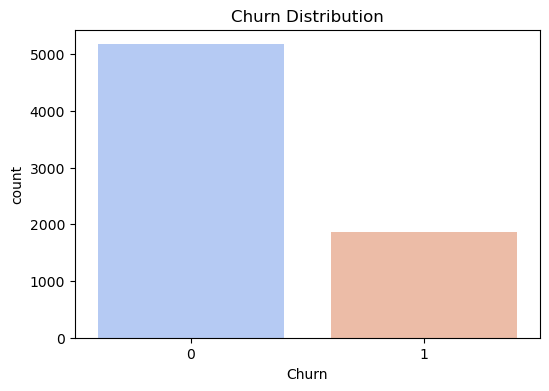

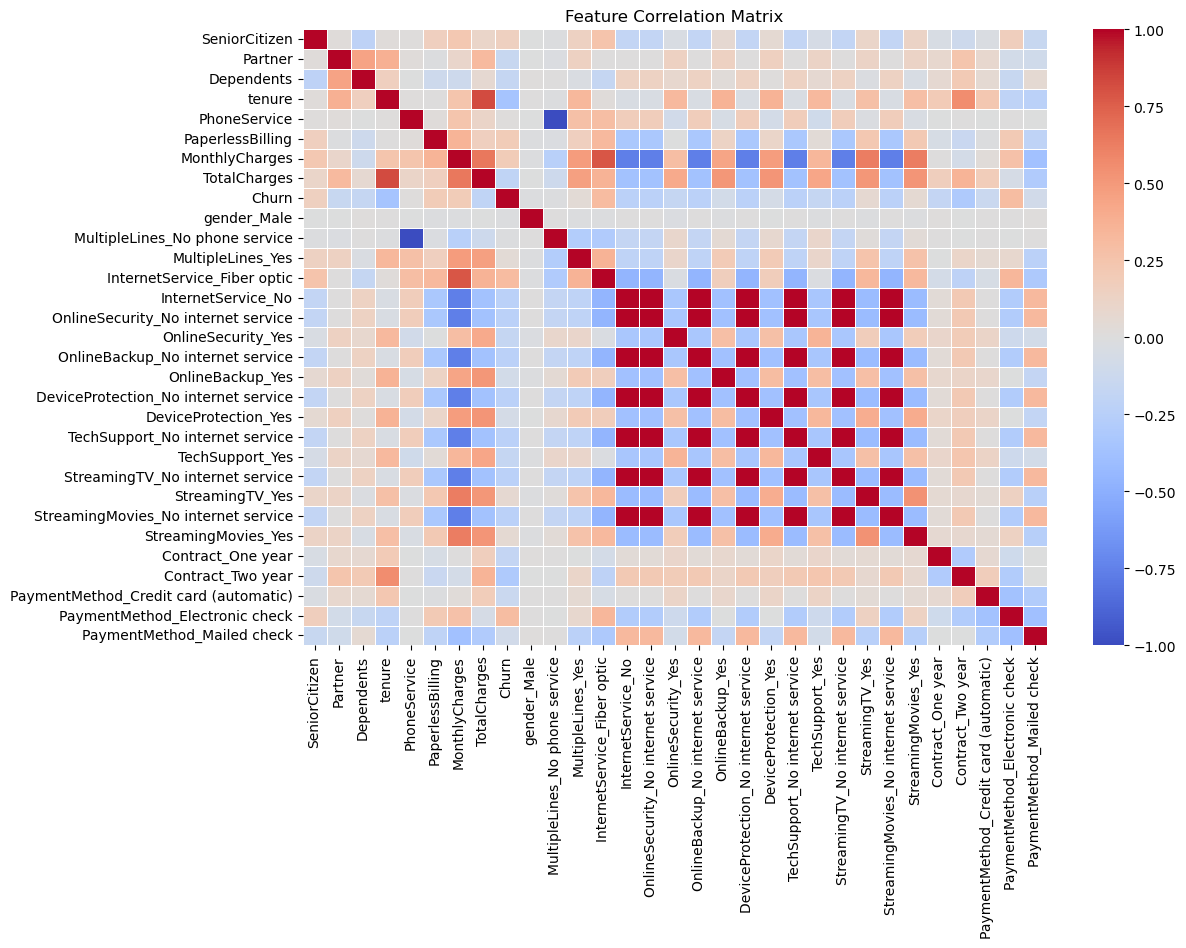

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


from our first graph,This confirms that the dataset is imbalanced, meaning the model might favor predicting "No Churn" more often.
Now we will be using SMOTE to balance the dataset

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE  # Make sure imbalanced-learn is installed

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
smote_class_distribution = collections.Counter(y_train_smote)
print("Class distribution after SMOTE:", smote_class_distribution)

# Train models on balanced data
rf_clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_smote = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Fit models
log_reg_smote.fit(X_train_smote, y_train_smote)
rf_clf_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_log_smote = log_reg_smote.predict(X_test)
y_pred_rf_smote = rf_clf_smote.predict(X_test)

# Evaluate models after applying SMOTE
log_reg_report_smote = classification_report(y_test, y_pred_log_smote)
rf_report_smote = classification_report(y_test, y_pred_rf_smote)

# Prepare results
model_results_smote = pd.DataFrame({
    "Model": ["Logistic Regression (SMOTE)", "Random Forest (SMOTE)"],
    "Accuracy": [accuracy_score(y_test, y_pred_log_smote), accuracy_score(y_test, y_pred_rf_smote)]
})

# Print model results after SMOTE
print("\nModel Performance After SMOTE:")
print(model_results_smote)

# Print classification reports
print("\nLogistic Regression Report (SMOTE):\n", log_reg_report_smote)
print("\nRandom Forest Report (SMOTE):\n", rf_report_smote)


Class distribution after SMOTE: Counter({0: 4138, 1: 4138})

Model Performance After SMOTE:
                         Model  Accuracy
0  Logistic Regression (SMOTE)  0.760114
1        Random Forest (SMOTE)  0.775018

Logistic Regression Report (SMOTE):
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409


Random Forest Report (SMOTE):
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.57      0.63      0.60       373

    accuracy                           0.78      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



The  results show that applying SMOTE (Synthetic Minority Over-sampling Technique) has improved the model's ability to detect churned customers (class 1).
Before SMOTE: The dataset was imbalanced, with more non-churned (0) customers than churned (1) customers.
After SMOTE: The dataset is now balanced with 4,138 churned and 4,138 non-churned customers, which helps the model learn better.

Random Forest performs better (77.5% accuracy) compared to Logistic Regression (76% accuracy).

Logistic Regression (SMOTE)
Precision (Class 1 - Churned Customers): 53% → Not very high, meaning it's making more false positives.
Recall (Class 1 - Churned Customers): 77% → Higher recall means it's correctly identifying more churned customers.
F1-score (Class 1): 63% → Balanced between precision and recall.


Random Forest (SMOTE)
Precision (Class 1 - Churned Customers): 57% → Slightly better at minimizing false positives.
Recall (Class 1 - Churned Customers): 63% → Lower recall than Logistic Regression but better precision.
F1-score (Class 1): 60% → Slightly worse than Logistic Regression but still reasonable.

Logistic Regression: Better recall, meaning it identifies more actual churned customers but has more false positives.
Random Forest: Better precision, meaning it is more confident in its churn predictions but misses some churn cases.
